In [4]:
#####################################################################################################
#####################################################################################################
# 4_Abstract classification
#####################################################################################################
#####################################################################################################

In [5]:
import os # File management
import string # Character chain management
import pandas # Import data into DataFrame  
from sklearn.model_selection import train_test_split # Selection abstract for learning corpus  
from sklearn.feature_extraction.text import CountVectorizer # Matrix construction for learning
from sklearn.linear_model import LogisticRegression # Logistic regression
from sklearn import metrics # Confusion matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.feature_extraction.text import TfidfTransformer # For reverse function
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from math import sqrt

In [6]:
# Launch the "import and cleaning abstracts" program
%run "C:\\Users\\....\\Program\\2_Import and cleaning abstracts.ipynb"


In [7]:
# Supervised learning of the abstract corpus

# Creation of the training sample (random_state = the seed of the random)
article_vf_Train,article_vf_Test=train_test_split(articles_vf,train_size=0.2,random_state=1,stratify=articles_vf['Selection'])

# Build the analyzer with new options: stop_words = 'english' and min_df = 20
analyseurBis = CountVectorizer(ngram_range=(1,4), stop_words='english',binary=True, min_df=0.04)

# Create the document term matrix
XTrain_bis = analyseurBis.fit_transform(article_vf_Train['Abstract'])

# With the tfidf transformation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(XTrain_bis)
X_train_tfidf.shape

# Transform the matrix into a numpy matrix
mdtTrainBis = XTrain_bis.toarray()
mdtTrain_tfidf = X_train_tfidf.toarray()

# Logistics with and without transformation tfidf
modelLog = LogisticRegression()
modelLog_tfidf = LogisticRegression()

# Naive Bayesien with and without transformation tfidf
modelNB=MultinomialNB()
modelNB_tfidf=MultinomialNB()

# Execution of models
modelLog_tfidf.fit(mdtTrain_tfidf,article_vf_Train['Selection'])
modelLog.fit(mdtTrainBis,article_vf_Train['Selection'])
modelNB_tfidf.fit(mdtTrain_tfidf,article_vf_Train['Selection'])
modelNB.fit(mdtTrainBis,article_vf_Train['Selection'])

# Evaluation on the test sample
mdtTestBis= analyseurBis.transform(article_vf_Test['Abstract'])

# Predictions for abstract test data
# Logistic
predTestBis_Log = modelLog.predict(mdtTestBis)
predTestBis_Log_tfidf= modelLog_tfidf.predict(mdtTestBis)
# Naive Bayesien
predTestBis_NB = modelNB.predict(mdtTestBis)
predTestBis_NB_tfidf = modelNB_tfidf.predict(mdtTestBis)

# Confusion matrices
tn, fp, fn, tp = metrics.confusion_matrix(article_vf_Test['Selection'],predTestBis_Log).ravel()
mcTestBis_Log = metrics.confusion_matrix(article_vf_Test['Selection'],predTestBis_Log)
mcTestBis_Log_tfidf = metrics.confusion_matrix(article_vf_Test['Selection'],predTestBis_Log_tfidf)
mcTestBis_NB = metrics.confusion_matrix(article_vf_Test['Selection'],predTestBis_NB)
mcTestBis_NB_tfidf  = metrics.confusion_matrix(article_vf_Test['Selection'],predTestBis_NB_tfidf)


C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# Displays of the different model outputs

print('Matrice logigistique sans tfidf:')
print(mcTestBis_Log)   
print()
print('F1 logigistique sans tfidf:')
print(f1_score(article_vf_Test['Selection'], predTestBis_Log, average='macro'))
print(fbeta_score(article_vf_Test['Selection'], predTestBis_Log, beta=2))
print()
print('Matrice logigistique avec tfidf:')
print(mcTestBis_Log_tfidf) 
print()
print('F1 logigistique avec tfidf:')
print(f1_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, average='macro'))
print(fbeta_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, beta=2))
print()
print('Matrice Naive Bayesien sans tfidf:')
print(mcTestBis_NB)
print()
print('F1 Naive bayesien sans tfidf:')
print(f1_score(article_vf_Test['Selection'], predTestBis_NB, average='macro'))
print(fbeta_score(article_vf_Test['Selection'], predTestBis_NB, beta=2))
print()
print('Matrice Naive Bayesien avec tfidf:')
print(mcTestBis_NB_tfidf)
print()
print('F1 Naive bayesien avec tfidf: ')
print(f1_score(article_vf_Test['Selection'], predTestBis_NB_tfidf, average='macro'))
print(fbeta_score(article_vf_Test['Selection'], predTestBis_NB_tfidf, beta=2))


Matrice logigistique sans tfidf:
[[1838   17]
 [  88   48]]

F1 logigistique sans tfidf:
0.7249207545978122
0.394088669950739

Matrice logigistique avec tfidf:
[[1548  307]
 [  18  118]]

F1 logigistique avec tfidf:
0.6628379501464428
0.608875128998968

Matrice Naive Bayesien sans tfidf:
[[1705  150]
 [  41   95]]

F1 Naive bayesien sans tfidf:
0.7228234210240521
0.6020278833967048

Matrice Naive Bayesien avec tfidf:
[[1838   17]
 [ 105   31]]

F1 Naive bayesien avec tfidf: 
0.6524171760881013
0.2618243243243243


In [9]:
# Export of the words used in the analysis and their associated regression coefficient
# We transpose the array of coeff and we transform it into a dataframe
coef_tr=numpy.transpose(modelLog_tfidf.coef_)

# Export to Excel
with pd.ExcelWriter(r'C:\\Users\\....\\Result\\coefficients_log.xlsx') as writer:  
    pandas.DataFrame(analyseurBis.get_feature_names()).to_excel(writer)
    pandas.DataFrame(coef_tr).to_excel(writer, sheet_name="Log avec tfidf 0.2")  


In [10]:
######################################################################
#    Automation of the program to test different parameters
######################################################################

In [11]:
# Parameters which may vary: sample size, root, beta for F1


# We vary the size of the sample then the root and for each sample the beta

# Initialization of lists
f05=[]
f1=[]
f2=[]
f3=[]
f5=[]
f100=[]
f1000=[]  
vrai_neg=[]
faux_neg=[]
vrai_pos=[]
faux_pos=[]

# We focus on the model that seems best to us: logistics with tfidf

# Creation of a list with all the desired sample sizes
echantillon=[0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for i in echantillon:

    for r in range(1,100):
        # Creation of the training sample (random_state = the seed of the random)
        article_vf_Train,article_vf_Test=train_test_split(articles_vf,train_size=i,random_state=r,stratify=articles_vf['Selection'])

        # Build the analyzer with new options: stop_words = 'english' and min_df = 20
        analyseurBis = CountVectorizer(ngram_range=(1,4), stop_words='english',binary=True, min_df=0.04)
        
        # Create the document term matrix
        XTrain_bis = analyseurBis.fit_transform(article_vf_Train['Abstract'])
       
        # The matrix with the terms of the abstracts
        mdtTrainBis = XTrain_bis.toarray()
        tfidf_transformer = TfidfTransformer()
        X_train_tfidf = tfidf_transformer.fit_transform(XTrain_bis)
        X_train_tfidf.shape
        
        # Transform the matrix into a numpy matrix
        mdtTrain_tfidf = X_train_tfidf.toarray()
        
        # The matrix with the terms of the abstracts
        mdtTrainBis = XTrain_bis.toarray()
        
    # Initialize the object
        # Logistic
        modelLog_tfidf = LogisticRegression()
        
        # Model execution
        modelLog_tfidf.fit(mdtTrain_tfidf,article_vf_Train['Selection'])
        
        # Evaluation on the test sample
        mdtTestBis= analyseurBis.transform(article_vf_Test['Abstract'])
        
    # Prédiction pour les données des abstracts test
        # Logistic
        predTestBis_Log_tfidf= modelLog_tfidf.predict(mdtTestBis)
           
        # Confusion matrices
        tn, fp, fn, tp = metrics.confusion_matrix(article_vf_Test['Selection'],predTestBis_Log_tfidf).ravel()
        
        vrai_neg.append(tn)
        faux_pos.append(fp)
        faux_neg.append(fn)
        vrai_pos.append(tp)
    
        f05.append(fbeta_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, beta=0.5))
        f1.append(fbeta_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, beta=1))
        f2.append(fbeta_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, beta=2))
        f3.append(fbeta_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, beta=3))
        f5.append(fbeta_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, beta=5))
        f100.append(fbeta_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, beta=100))
        f1000.append(fbeta_score(article_vf_Test['Selection'], predTestBis_Log_tfidf, beta=1000))


C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MLEGUERN\AppData\Local\Continuum\anaconda3\lib\site-package

In [12]:
df05 = pd.DataFrame(np.array(f05).reshape(9,99))
df05t=df05.T

df1 = pd.DataFrame(np.array(f1).reshape(9,99))
df1t=df1.T

df3 = pd.DataFrame(np.array(f3).reshape(9,99))
df3t=df3.T

df100 = pd.DataFrame(np.array(f100).reshape(9,99))
df100t=df100.T

df2 = pd.DataFrame(np.array(f2).reshape(9,99))
df2t=df2.T

df5 = pd.DataFrame(np.array(f5).reshape(9,99))
df5t=df5.T 

df1000 = pd.DataFrame(np.array(f1000).reshape(9,99))
df1000t=df1000.T

# Export to Excel
with pd.ExcelWriter(r'C:\\Users\\....\\Result\\beta_and_ci.xlsx') as writer:  
    df05t.to_excel(writer, sheet_name="beta=0.5")
    df1t.to_excel(writer, sheet_name="beta=1")
    df2t.to_excel(writer, sheet_name="beta=2")
    df3t.to_excel(writer, sheet_name="beta=3")
    df5t.to_excel(writer, sheet_name="beta=5")
    df100t.to_excel(writer, sheet_name="beta=100")
    df1000t.to_excel(writer, sheet_name="beta=1000")
    

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [14]:
df_vp=pd.DataFrame(np.array(vrai_pos).reshape(9,99))
df_vpt=df_vp.T
df_vn=pd.DataFrame(np.array(vrai_neg).reshape(9,99))
df_vnt=df_vn.T
df_fn=pd.DataFrame(np.array(faux_neg).reshape(9,99))
df_fnt=df_fn.T
df_fp=pd.DataFrame(np.array(faux_pos).reshape(9,99))
df_fpt=df_fp.T


In [15]:
with pd.ExcelWriter(r'C:\\Users\\....\\Result\\result_matrix.xlsx') as writer:  
    df_vpt.to_excel(writer, sheet_name="True positive")
    df_vnt.to_excel(writer, sheet_name="True negative")
    df_fnt.to_excel(writer, sheet_name="False negative")
    df_fpt.to_excel(writer, sheet_name="False positive")

# Calculation of means and standard error
meanvp = df_vpt.mean()
stdvp = df_vpt.std()
meanvn = df_vnt.mean()
stdvn = df_vnt.std()
meanfn = df_fnt.mean()
stdfn = df_fnt.std()
meanfp = df_fpt.mean()
stdfp = df_fpt.std()

# Calculation of CI
conf_intvp = stats.norm.interval(0.95, loc=meanvp, scale=stdvp/sqrt(99))
conf_intvn = stats.norm.interval(0.95, loc=meanvn, scale=stdvn/sqrt(99))
conf_intfn = stats.norm.interval(0.95, loc=meanfn, scale=stdfn/sqrt(99))
conf_intfp = stats.norm.interval(0.95, loc=meanfp, scale=stdfp/sqrt(99))


In [16]:
# Creation of confidence intervals for the matrix of the selected model
print(meanvn[3], end=' [')
print(conf_intvn[0][3], end=' ; ')
print(conf_intvn[1][3], end=']')
print()

print(meanfp[3], end=' [')
print(conf_intfp[0][3], end=' ; ')
print(conf_intfp[1][3], end=']')
print()

print(meanfn[3], end=' [')
print(conf_intfn[0][3], end=' ; ')
print(conf_intfn[1][3], end=']')
print()

print(meanvp[3], end=' [')
print(conf_intvp[0][3], end=' ; ')
print(conf_intvp[1][3], end=']')
print()


1575.6666666666667 [1564.161692597146 ; 1587.1716407361876]
279.3333333333333 [267.8283592638125 ; 290.8383074028541]
18.87878787878788 [18.10337795661011 ; 19.654197800965648]
117.12121212121212 [116.34580219903435 ; 117.8966220433899]


In [17]:
# Import of Excel file
xl = pd.ExcelFile("C:\\Users\\....\\Result\\beta_and_ci.xlsx")

df05 = xl.parse("beta=0.5")
df1 = xl.parse("beta=1")
df2 = xl.parse("beta=2")
df3 = xl.parse("beta=3")
df5 = xl.parse("beta=5")
df100 = xl.parse("beta=100")
df1000 = xl.parse("beta=1000")

# Removal of unnecessary information
del df05['Unnamed: 0']
del df1['Unnamed: 0']
del df2['Unnamed: 0'] 
del df3['Unnamed: 0']
del df5['Unnamed: 0']
del df100['Unnamed: 0']
del df1000['Unnamed: 0']

# Calculation of means and standard error
meanf05 = df05.mean()
stdf05 = df05.std()
meanf1 = df1.mean()
stdf1 = df1.std()
meanf2 = df2.mean()
stdf2 = df2.std()
meanf3 = df3.mean()
stdf3 = df3.std()
meanf5 = df5.mean()
stdf5 = df5.std()
meanf100 = df100.mean()
stdf100 = df100.std()
meanf1000 = df1000.mean()
stdf1000 = df1000.std()

# Calculation of CI
conf_intf05 = stats.norm.interval(0.95, loc=meanf05, scale=stdf05/sqrt(99))
conf_intf1 = stats.norm.interval(0.95, loc=meanf1, scale=stdf1/sqrt(99))
conf_intf2 = stats.norm.interval(0.95, loc=meanf2, scale=stdf2/sqrt(99))
conf_intf3 = stats.norm.interval(0.95, loc=meanf3, scale=stdf3/sqrt(99))
conf_intf5 = stats.norm.interval(0.95, loc=meanf5, scale=stdf5/sqrt(99))
conf_intf100 = stats.norm.interval(0.95, loc=meanf100, scale=stdf100/sqrt(99))
conf_intf1000 = stats.norm.interval(0.95, loc=meanf1000, scale=stdf1000/sqrt(99))


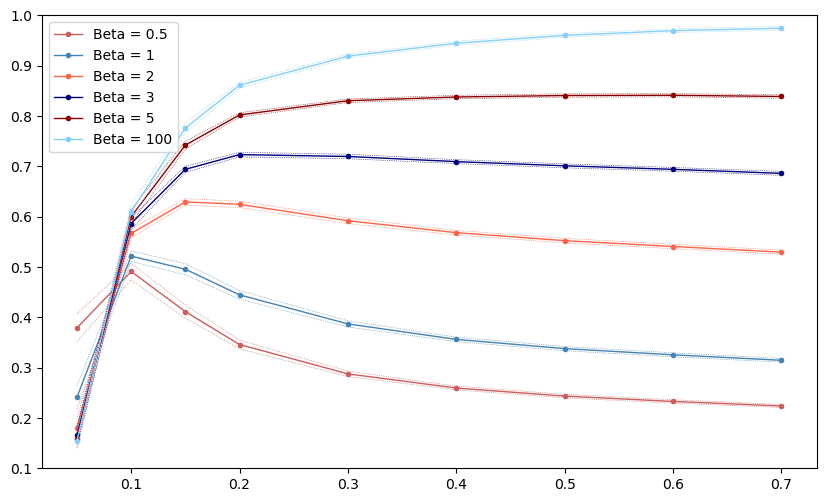

In [18]:
# Creation of a list with all the desired sample sizes
echantillon=[0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Creation of the X scale with the sample sizes
x=np.asarray(echantillon)
plt.figure(figsize=(10,6), dpi=100)

# The y-axis represents percentages, we use the range 0.1 / 1
plt.ylim(0.1,1.0)

G1=plt.plot(x, meanf05, marker=".", color='#CD5C5C',linewidth=1, linestyle='-', label='Beta = 0.5')
G1=plt.plot(x, conf_intf05[0], color='#CD5C5C', linewidth=0.5, linestyle=':')
G1=plt.plot(x, conf_intf05[1], color='#CD5C5C', linewidth=0.5, linestyle=':')

G1=plt.plot(x, meanf1, marker=".", color='#4682B4',linewidth=1, linestyle='-', label='Beta = 1')
G1=plt.plot(x, conf_intf1[0], color='#4682B4', linewidth=0.5, linestyle=':')
G1=plt.plot(x, conf_intf1[1], color='#4682B4', linewidth=0.5, linestyle=':')

G1=plt.plot(x, meanf2, marker=".", color='#FF6347',linewidth=1, linestyle='-', label='Beta = 2')
G1=plt.plot(x, conf_intf2[0], color='#FF6347', linewidth=0.5, linestyle=':')
G1=plt.plot(x, conf_intf2[1], color='#FF6347', linewidth=0.5, linestyle=':')

G1=plt.plot(x, meanf3, marker=".", color='#000080',linewidth=1, linestyle='-', label='Beta = 3')
G1=plt.plot(x, conf_intf3[0], color='#000080', linewidth=0.5, linestyle=':')
G1=plt.plot(x, conf_intf3[1], color='#000080', linewidth=0.5, linestyle=':')

G1=plt.plot(x, meanf5, marker=".", color='#8B0000',linewidth=1, linestyle='-', label='Beta = 5')
G1=plt.plot(x, conf_intf5[0], color='#8B0000', linewidth=0.5, linestyle=':')
G1=plt.plot(x, conf_intf5[1], color='#8B0000', linewidth=0.5, linestyle=':')

G1=plt.plot(x, meanf100, marker=".", color='#87CEFA',linewidth=1, linestyle='-', label='Beta = 100')
G1=plt.plot(x, conf_intf100[0], color='#87CEFA', linewidth=0.5, linestyle=':')
G1=plt.plot(x, conf_intf100[1], color='#87CEFA', linewidth=0.5, linestyle=':')

G1=plt.legend(loc='upper left')

# Print the plot
plt.show()

# Save the plot
fig = G1.get_figure()
fig.savefig("C:\\Users\\....\\Result\\Graph_Classification.png")
